In [206]:
%%bash
mkdir -p /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks
mkdir -p /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts
mkdir -p /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/logs
mkdir -p /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots

First, quantify reads in targeted regions

In [1]:
%%bash
module load bedtools2
# Create union peakset for FLAG-KRAB samples:
cat /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.flag.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.narrowPeak \
| /bin/grep "^chr" \
| sort -k1,1 -k2,2n \
| bedtools merge -nonamecheck -i stdin \
| sort -k1,1 -k2,2n \
| bedtools closest \
    -nonamecheck \
    -a stdin \
    -b <(sort -k1,1 -k2,2n /data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.no_gm.bed) \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset.bed

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [24]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
python /data/reddylab/Alex/reddylab_utils/scripts/bed_to_saf.py \
    -beds  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset.bed \
    -safs  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset.saf
    

In [28]:
%%bash
/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts \
    -F SAF \
    -a /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset.saf \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_KRAB.flag.union_peakset.featureCounts.txt \
    /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.flag.{targeted,scram,PBS}.rep*masked.dedup.sorted.bam  \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/logs/mmLiver_KRAB.flag.union_peakset.featureCounts.out \
2>&1


Same, but discarding peaks that are also found in input controls (artifacts!)

In [2]:
%%bash
module load bedtools2
# Create union peakset for FLAG-KRAB samples:
cat /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.flag.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.narrowPeak \
| /bin/grep "^chr" \
| sort -k1,1 -k2,2n \
| bedtools merge -nonamecheck -i stdin \
| sort -k1,1 -k2,2n \
| bedtools intersect -wa -v -a stdin -b /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.[Ii]nput.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.narrowPeak \
| bedtools closest \
    -nonamecheck \
    -a stdin \
    -b <(sort -k1,1 -k2,2n /data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.no_gm.bed) \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset_no_input.bed

***** WARNING: File /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.Input.targeted.rep3.masked.dedup.sorted_peaks.narrowPeak has inconsistent naming convention for record:
chr1	16008183	16008324	mmLiver_KRAB.Input.rep3.masked.dedup.sorted_peak_38	71	.	6.37052	12.25399	7.18197	76

***** WARNING: File /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.Input.targeted.rep3.masked.dedup.sorted_peaks.narrowPeak has inconsistent naming convention for record:
chr1	16008183	16008324	mmLiver_KRAB.Input.rep3.masked.dedup.sorted_peak_38	71	.	6.37052	12.25399	7.18197	76



In [3]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
python /data/reddylab/Alex/reddylab_utils/scripts/bed_to_saf.py \
    -beds  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset_no_input.bed \
    -safs  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset_no_input.saf
    

In [25]:
%%bash
/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts \
    -F SAF \
    -a /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset_no_input.saf \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_KRAB.flag.union_peakset_no_input.featureCounts.txt \
    /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.flag.{targeted,scram,PBS}.rep*masked.dedup.sorted.bam  \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/logs/mmLiver_KRAB.flag.union_peakset_no_input.featureCounts.out \
2>&1


Plot FLAG enrichment for PBS, Scram and Targeted

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_KRAB.flag.union_peakset_no_input.featureCounts.txt', sep="\t", comment="#")
df_anno = pd.read_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset.bed', sep='\t', 
                      header=None)
df_anno = df_anno.drop(columns=range(3,9) + [10], axis=1)
df_anno.columns = ['Chr', 'Start', 'End', 'GeneSymbol']
df = df.merge(df_anno)


lib_sizes = []
for bam in df.columns.values[6:-1]:
    tt = np.loadtxt(bam.replace('masked.dedup.sorted.bam', 'bowtie.log.read_count.mapped'))
    lib_sizes.append(tt[1])

df.loc[:, df.columns.values[6:-1]] = df.loc[:, df.columns.values[6:-1]]/lib_sizes*1e6

df.index = df.Geneid + "_" + df.GeneSymbol 
df = df[~df.index.str.contains('chrM')]

# Remove Mitochondrial peaks
df = df[~df.index.str.contains('chrM')]

df.columns = df.columns.str\
    .replace('/data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.flag.','')\
    .str.replace('.masked.dedup.sorted.bam','')

df = df.loc[:,  df.columns.values[6:-1]]

# Drop failed library
df.drop('scram.rep8', axis=1, inplace=True)

df.columns = pd.MultiIndex.from_arrays( [[c.split('.')[0] for c in df.columns], df.columns])

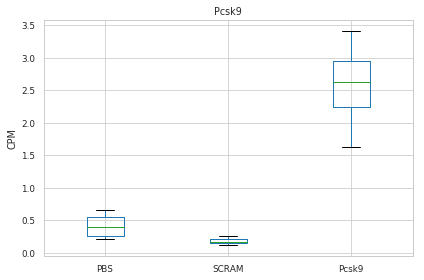

In [2]:
# Save plot for special case
gene_of_interest = 'Pcsk9'
figg = plt.figure(figsize=[6,4])
fig = df.loc[df.index.str.contains(gene_of_interest),: ].T.groupby(level=0, axis=0)\
    .boxplot(
        subplots=False, 
    )
fig.axes.set_xticklabels(['PBS', 'SCRAM', 'Pcsk9']);
fig.axes.set_title(gene_of_interest);
fig.set_ylabel('CPM')
figg.tight_layout()
figg.savefig('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots/mmLiver_KRAB.flag.union_peakset.cpms.%s.pdf' % (gene_of_interest))

In [29]:
# Special case: Pdx1 peak overlaps 2 genes in the annotation, therefore appears twice. Remove "Plut"
# df = df[df.index != 'chr5_147269830_147270140_Plut']


In [7]:
df.loc[df.var(axis=1).sort_values(ascending=False).index, :]

targeted                \
                                        targeted.rep3 targeted.rep5   
chr5_90474355_90474536_Alb                   1.088528      0.393317   
chr17_46857103_46857320_Bicral               1.088528      0.749175   
chr2_173153049_173153863_Pck1                5.442641      2.116418   
chr7_6410043_6410427_Smim17                  4.716955      2.359900   
chr8_109990352_109991756_Tat                 5.533352      3.277639   
chr9_21950219_21950703_Plppr2                4.172691      2.921781   
chr14_76877399_76877806_4930431P22Rik        0.453553      0.074917   
chr15_72568547_72568944_Trappc9              2.993453      2.116418   
chr4_106464226_106464732_Pcsk9               2.449188      3.408744   
chr11_87422702_87423225_Tex14                3.900559      1.854207   
chr11_87422702_87423225_Rnu1a1               3.900559      1.854207   
chr12_54696651_54697033_Eapp                 3.991270      1.423432   
chr5_90467559_90468203_Alb                   3.900559      1.236138   
chr5_90462622_90463180_Alb                   3.991270      1.273597   
chr15_76522078_76522446_Scrt1                1.814214      1.704372   
chr15_84829436_84829822_Phf21b               2.993453      1.760560   
chr9_108826797_108827192_Celsr3              2.539899      1.161221   
chr5_90470621_90470999_Alb                   3.174874      0.618069   
chr5_90461310_90461704_Alb                   2.449188      0.730445   
chr5_90461736_90462287_Alb                   2.993453      1.105033   
chr11_87443344_87443641_Rnu3b1               2.267767      0.655528   
chr11_87443344_87443641_Rnu3b1               2.267767      0.655528   
chr11_87443344_87443641_Rnu3b1               2.267767      0.655528   
chr11_87443344_87443641_Rnu3b1               2.267767      0.655528   
chr11_87443344_87443641_Tex14                2.267767      0.655528   
chr12_42972827_42973094_Immp2l               1.179239      0.767904   
chr8_84947222_84947591_Rtbdn                 2.358478      1.236138   
chr2_173154328_173154713_Pck1                2.267767      0.955198   
chr11_87448715_87449053_Rnu3b3               2.086346      1.048844   
chr11_87448715_87449053_Rnu3b3               2.086346      1.048844   
...                                               ...           ...   
chr4_140259034_140259242_Igsf21              0.544264      0.468234   
chr7_140774194_140774446_Cyp2e1              0.816396      0.318399   
chr9_46230930_46231106_Apoa1                 0.907107      0.618069   
chr4_150857874_150858085_Errfi1              0.725685      0.468234   
chr12_55600236_55600456_Insm2                0.907107      0.599340   
chr2_136714192_136714421_Snap25              0.907107      0.505693   
chr8_109993925_109994101_Tat                 0.725685      0.243482   
chr4_150327787_150328015_Rere                0.453553      0.168564   
chr4_150855614_150855802_Errfi1              0.544264      0.374587   
chr4_131115332_131115548_A930031H19Rik       0.634975      0.786633   
chr11_101369463_101369667_G6pc               0.453553      0.355858   
chr19_4060556_4060764_Gstp3                  0.634975      0.318399   
chr8_109991764_109991922_Tat                 0.272132      0.599340   
chr15_12817418_12817623_6030458C11Rik        0.090711      0.056188   
chr12_108851928_108852084_Slc25a47           0.544264      0.355858   
chr5_144491378_144491577_Nptx2               0.634975      0.168564   
chr7_30941209_30941389_Hamp                  0.272132      0.299670   
chr1_171213938_171214134_Nr1i3               0.634975      0.131106   
chr5_121078626_121078786_Ptpn11              0.362843      0.299670   
chr12_40609767_40609974_Dock4                0.000000      0.056188   
chr4_148229797_148229975_Disp3               0.453553      0.468234   
chr6_149167679_149167850_Amn1                0.634975      0.318399   
chr10_42181945_42182141_Foxo3                0.000000      0.074917   
chr6_55108453_55108613_Crhr2                 0.362843      0.505693  

In [3]:
df = df.drop_duplicates()

In [14]:
df.head()

targeted                              \
                               targeted.rep3 targeted.rep5 targeted.rep6   
chr1_63114112_63114344_Ino80d       0.816396      0.842821      0.442775   
chr1_171213938_171214134_Nr1i3      0.634975      0.131106      0.147592   
chr10_40258455_40258693_Rnu3a       1.360660      0.730445      1.106939   
chr10_42181945_42182141_Foxo3       0.000000      0.074917      0.147592   
chr11_55607774_55608047_Glra1       0.997818      0.936468      0.811755   

                                                   scram              \
                               targeted.rep7 scram.rep10 scram.rep11   
chr1_63114112_63114344_Ino80d       0.333725    0.814355    0.330582   
chr1_171213938_171214134_Nr1i3      0.095350    0.428608    0.275485   
chr10_40258455_40258693_Rnu3a       0.476750    0.642912    0.881553   
chr10_42181945_42182141_Foxo3       0.238375    0.514329    0.275485   
chr11_55607774_55608047_Glra1       0.715125    1.371545    0.440777   

                                                PBS                      \
                               scram.rep9 PBS.rep12  PBS.rep1  PBS.rep2   
chr1_63114112_63114344_Ino80d    0.714283  0.591040  0.507233  0.584543   
chr1_171213938_171214134_Nr1i3   0.535712  0.161193  0.405786  0.208765   
chr10_40258455_40258693_Rnu3a    0.982139  0.644771  1.826038  0.835062   
chr10_42181945_42182141_Foxo3    0.535712  0.134327  0.101447  0.104383   
chr11_55607774_55608047_Glra1    1.279757  0.886560  1.623145  1.106457   

                                          
                                PBS.rep4  
chr1_63114112_63114344_Ino80d   1.489958  
chr1_171213938_171214134_Nr1i3  0.093122  
chr10_40258455_40258693_Rnu3a   0.744979  
chr10_42181945_42182141_Foxo3   0.093122  
chr11_55607774_55608047_Glra1   2.048692

In [4]:
(df>1).any(axis=1).sum()

81

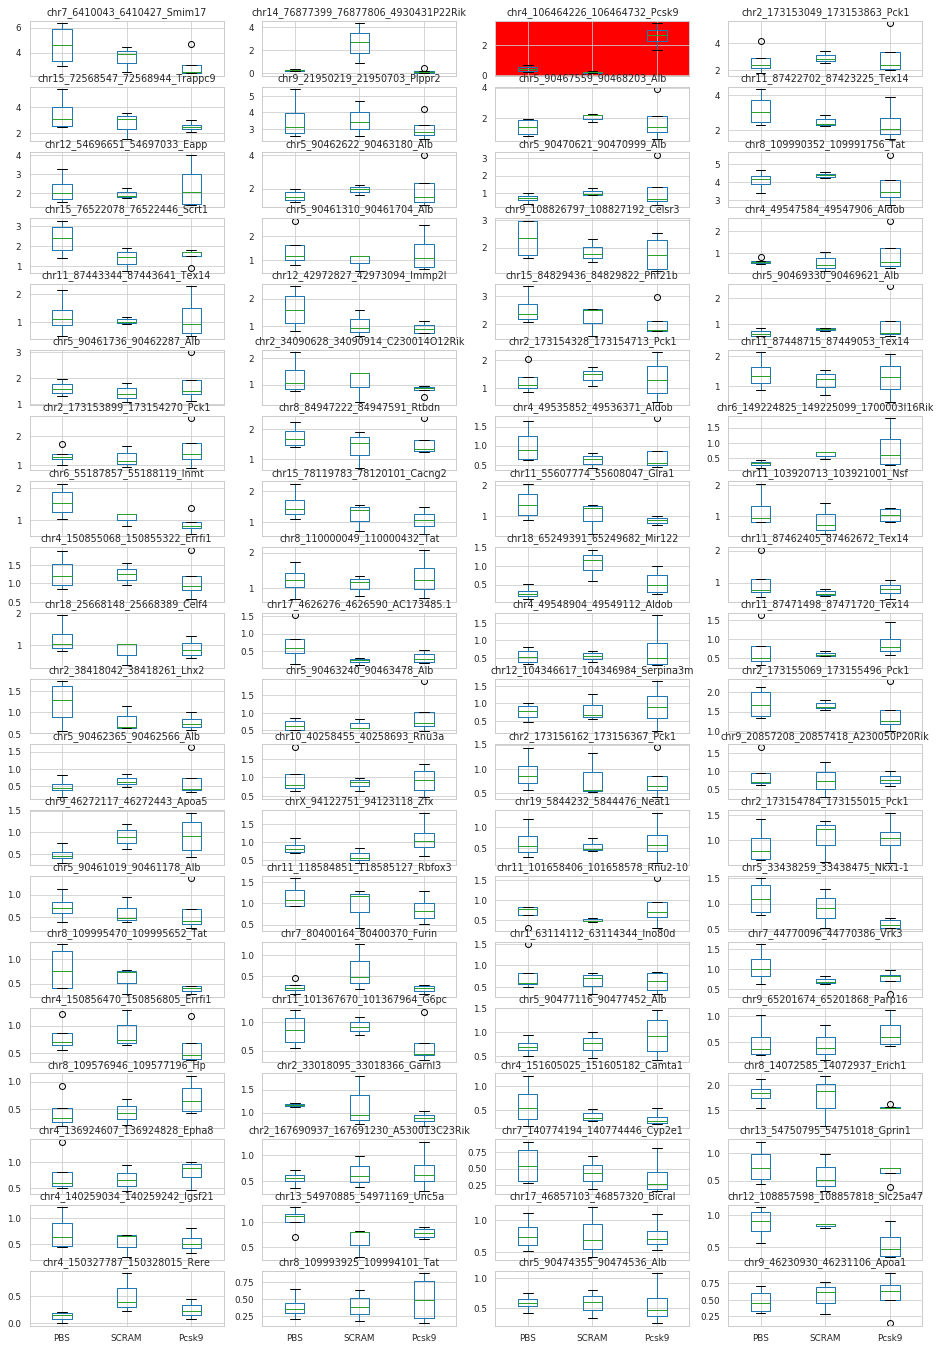

In [6]:
from matplotlib import pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42

ncols = 4
nrows = 20# int(np.ceil(df.shape[0] / (1.*ncols)))
figg, axes = plt.subplots(nrows, ncols, sharey=False, figsize=[16, nrows+4])
for ix, ii in enumerate(df.var(axis=1).sort_values(ascending=False).head(80).index):
    fig = df.loc[df.index==ii,: ].T.groupby(level=0, axis=0)\
        .boxplot(
            subplots=False, 
            ax = axes.flatten()[ix]
        )
    if gene_of_interest in ii:
        fig.axes.set_facecolor('r')
    if ix>=((nrows-1)*ncols):
        fig.axes.set_xticklabels(['PBS', 'SCRAM', 'Pcsk9']);
    else:
        fig.axes.set_xticklabels([]);
    fig.axes.set_title(ii);


In [7]:
figg.tight_layout()
figg.savefig('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/plots/mmLiver_KRAB.flag.union_peakset_no_input.cpms.gridplot.pdf')

In [ ]:
df.to_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_KRAB.flag.union_peakset.cpms.txt',sep='\t')

Matt is interested in quantify the enrichment of KRAB signal in the KRAB-FLAG samples compared with PBS and scram guides, also looking at enrichment of K27ac signal. 
Conversely, for samples treated with KRAB he would like to quantify the gain of signal of KRAB in FLAG samples versus scram and PBS, also looking at enrichment of K9me3 signal.

- [ ] Use the peaksets of K27ac and K9me3 to quantify signal in those peaks.

Created the expanded peakset with K9me3 broadPeaks 

In [19]:
%%bash
module load bedtools2
# Create union peakset for FLAG-KRAB samples:
cat /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.K9me3.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.broadPeak \
| /bin/grep "^chr" \
| sort -k1,1 -k2,2n \
| bedtools merge -nonamecheck -i stdin \
| sort -k1,1 -k2,2n \
| bedtools intersect -wa -v -a stdin -b /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.[Ii]nput.{targeted,scram,PBS}.rep*.masked.dedup.sorted_peaks.broadPeak \
| bedtools closest \
    -nonamecheck \
    -a stdin \
    -b <(sort -k1,1 -k2,2n /data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.no_gm.bed) \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.K9me3.union_peakset_no_input.bed

***** WARNING: File /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.Input.targeted.rep3.masked.dedup.sorted_peaks.broadPeak has inconsistent naming convention for record:
chr1	4785303	4785670	mmLiver_KRAB.Input.rep3.masked.dedup.sorted_peak_45	13	.	3.57903	4.98180	1.34112

***** WARNING: File /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.Input.targeted.rep3.masked.dedup.sorted_peaks.broadPeak has inconsistent naming convention for record:
chr1	4785303	4785670	mmLiver_KRAB.Input.rep3.masked.dedup.sorted_peak_45	13	.	3.57903	4.98180	1.34112



Add peaks from FLAG samples extended with 1kb in each flanking region

In [1]:
%%bash
module load bedtools2
cat \
    <(awk -vOFS="\t" '{$2=($2+$3)/2;$3=$2+1; print $0}' /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.flag.union_peakset_no_input.bed | bedtools slop -i stdin -b 1000 -g /data/reddylab/Reference_Data/Genomes/mm10/GRCm38.header.sizes) \
    /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.K9me3.union_peakset_no_input.bed \
| sort -k1,1 -k2,2n \
| bedtools merge -i stdin \
| bedtools closest \
    -nonamecheck \
    -a stdin \
    -b <(sort -k1,1 -k2,2n /data/reddylab/Reference_Data/Gencode/vM19/gencode.vM19.basic.annotation.no_gm.bed) \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.K9me3.union_peakset_no_input_plus_flag.bed

In [2]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
python /data/reddylab/Alex/reddylab_utils/scripts/bed_to_saf.py \
    -beds  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.K9me3.union_peakset_no_input_plus_flag.bed \
    -safs  /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.K9me3.union_peakset_no_input_plus_flag.saf
    

In [3]:
%%bash
/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts \
    -F SAF \
    -a /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/peaks/mmLiver_KRAB.K9me3.union_peakset_no_input_plus_flag.saf \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/counts/mmLiver_KRAB.K9me3.union_peakset_no_input_plus_flag.featureCounts.txt \
    /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/mmLiver_KRAB.K9me3.{targeted,scram,PBS}.rep*masked.dedup.sorted.bam  \
> /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/logs/mmLiver_KRAB.K9me3.union_peakset_no_input_plus_flag.featureCounts.out \
2>&1
